DF:      Number of times pregnant  Plasma glucose concentration  \
0                    0.352941                      0.743719   
1                    0.058824                      0.427136   
2                    0.470588                      0.919598   
3                    0.058824                      0.447236   
4                    0.000000                      0.688442   
..                        ...                           ...   
763                  0.588235                      0.507538   
764                  0.117647                      0.613065   
765                  0.294118                      0.608040   
766                  0.058824                      0.633166   
767                  0.058824                      0.467337   

     Diastolic blood pressure  Triceps skinfold thickness  \
0                    0.590164                    0.353535   
1                    0.540984                    0.292929   
2                    0.524590                    0.00000

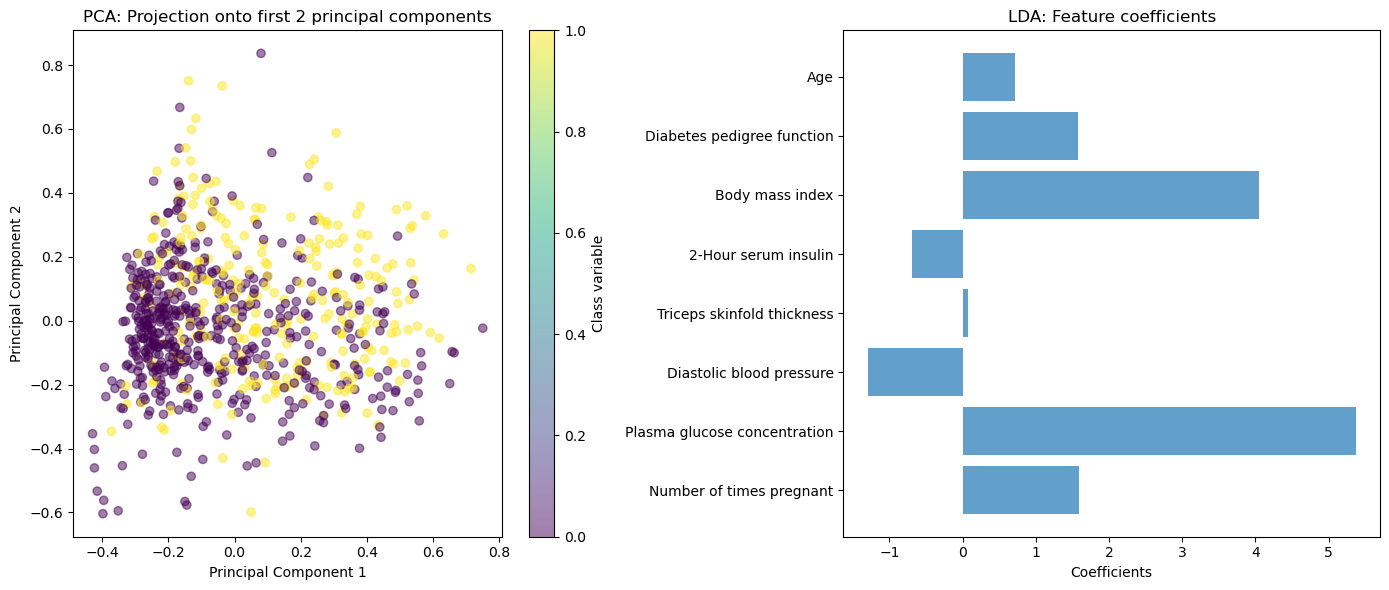

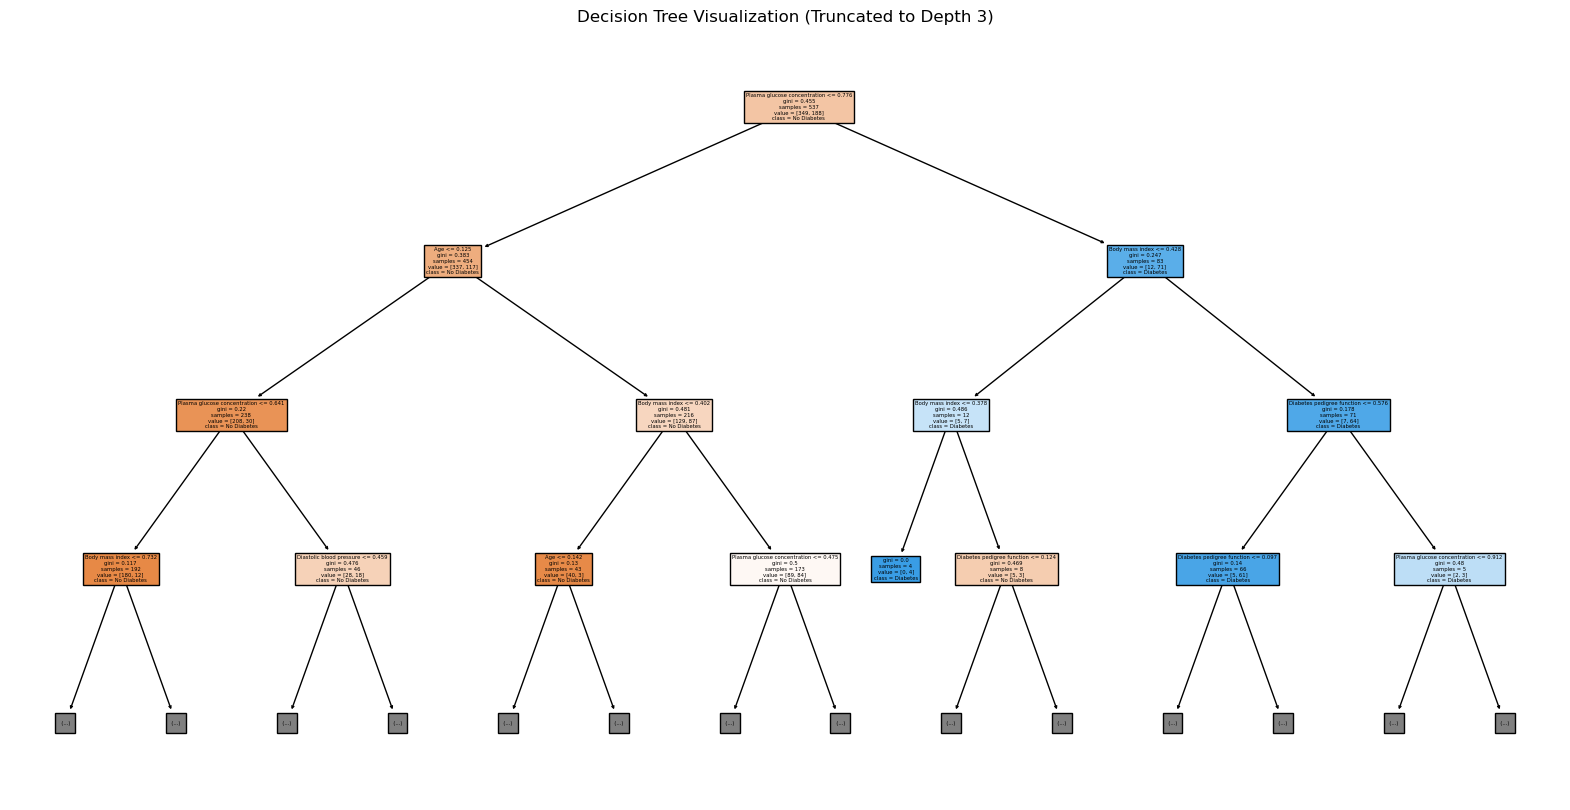

(array([[119,  32],
        [ 27,  53]], dtype=int64),
 '              precision    recall  f1-score   support\n\n         0.0       0.82      0.79      0.80       151\n         1.0       0.62      0.66      0.64        80\n\n    accuracy                           0.74       231\n   macro avg       0.72      0.73      0.72       231\nweighted avg       0.75      0.74      0.75       231\n')

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# Verileri yükleme
columns = [
    'Number of times pregnant',
    'Plasma glucose concentration',
    'Diastolic blood pressure',
    'Triceps skinfold thickness',
    '2-Hour serum insulin',
    'Body mass index',
    'Diabetes pedigree function',
    'Age',
    'Class variable'
]

data = pd.read_csv("veri-seti.txt", sep='\t', header=None, names=columns)

# Min-Max Normalizasyonu uygulama
scaler = MinMaxScaler()
data_normalizasyon = pd.DataFrame(scaler.fit_transform(data), columns=columns)
print("DF:", data_normalizasyon)

# PCA ve LDA uygulama
X = data_normalizasyon.drop('Class variable', axis=1)
y = data_normalizasyon['Class variable']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
print("X_pca:", X_pca)
print("X_lda:", X_lda)

import matplotlib.pyplot as plt
import numpy as np
# Prepare data and class labels
X = data_normalizasyon.drop('Class variable', axis=1)
y = data_normalizasyon['Class variable']

# PCA - Reducing the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# LDA - Reducing the dimensionality to 1 (since there are only 2 classes)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Collecting the PCA and LDA results
pca_components = pca.components_
lda_scalings = lda.scalings_.flatten()

# Creating a dataframe to compare feature importance
pca_df = pd.DataFrame(pca_components, columns=X.columns, index=['PC1', 'PC2'])
lda_df = pd.DataFrame(lda_scalings, index=X.columns, columns=['LD1']).T

pca_df, lda_df
# Scatter plot for PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA: Projection onto first 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class variable')

# Coefficient plot for LDA
plt.subplot(1, 2, 2)
coefficients = lda_scalings
features = X.columns
y_pos = np.arange(len(features))
plt.barh(y_pos, coefficients, align='center', alpha=0.7)
plt.yticks(y_pos, features)
plt.xlabel('Coefficients')
plt.title('LDA: Feature coefficients')

plt.tight_layout()
plt.show()

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Çoklu Doğrusal Regresyon uygulama
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_test_pred = linear_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Lojistik Regresyon uygulama
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, y_train)
y_test_pred_logistic = logistic_regressor.predict(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Apply Multinomial Logistic Regression
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, y_train)

# Predict on test data
y_test_pred_logistic = logistic_regressor.predict(X_test)

# Calculating the performance metrics
conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)
class_report = classification_report(y_test, y_test_pred_logistic)

# Output the coefficients and performance metrics
logistic_regressor.coef_, conf_matrix, class_report

# Karar Ağacı sınıflandırması uygulama
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
y_test_pred_tree = decision_tree_classifier.predict(X_test)
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Apply Decision Tree Classification
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Predict on test data
y_test_pred_tree = decision_tree_classifier.predict(X_test)

# Calculating the performance metrics
conf_matrix_tree = confusion_matrix(y_test, y_test_pred_tree)
class_report_tree = classification_report(y_test, y_test_pred_tree)

# Output the performance metrics
conf_matrix_tree, class_report_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_classifier, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], max_depth=3)
plt.title("Decision Tree Visualization (Truncated to Depth 3)")
plt.show()

# Naive Bayes sınıflandırıcısı uygulama
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_test_pred_nb = naive_bayes_classifier.predict(X_test)
# Calculating the performance metrics
conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)
class_report_nb = classification_report(y_test, y_test_pred_nb)
# Output the performance metrics
conf_matrix_nb, class_report_nb
